# Student Healthcare
This notebook Predicts the heath condition of a student according to his/her medical data.

In [1]:
import pandas as pd
import numpy as np

train = pd.read_excel("student_helthcare_dataset_train.xlsx")
test = pd.read_excel("student_helthcare_dataset_test.xlsx")
columns = train.columns

train.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Ruben Burns,35,Male,O+,Asthma,2023-06-01,Diane Jackson,"Burke, Griffin and Cooper",UnitedHealthcare,47304.064845,404,Emergency,2023-06-15,Lipitor,Normal
1,Chad Byrd,61,Male,B-,NaN,2019-01-09,Paul Baker,Walton LLC,Medicare,0.000000,292,Emergency,2019-02-08,Lipitor,Normal
2,Antonio Frederick,49,Male,B-,Asthma,2020-05-02,Brian Chandler,Garcia Ltd,Medicare,23303.322092,-480,Urgent,2020-05-03,Penicillin,Abnormal
3,Mrs. Brandy Flowers,51,Male,O-,Arthritis,2021-07-09,Dustin Griffin,"Jones, Brown and Murray",UnitedHealthcare,-18086.344184,477,Urgent,2021-08-02,NaN,Normal
4,Patrick Parker,41,Male,AB+,Arthritis,2020-08-20,Robin Green,Boyd PLC,Aetna,22522.363385,180,Urgent,2020-08-23,Aspirin,Abnormal


# Data Exploration

In [2]:
train.describe().round(2)

,Age,Billing Amount,Room Number
count,6050.00,6050.00,6050.00
mean,51.43,21587.14,300.27
std,19.55,294099.35,118.03
min,18.00,-22822979.21,-492.00
25%,35.00,13172.40,198.00
50%,52.00,25073.42,300.50
75%,68.00,37712.03,402.00
max,85.00,142610.70,500.00


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6050 entries, 0 to 6049
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                6050 non-null   object 
 1   Age                 6050 non-null   int64  
 2   Gender              6050 non-null   object 
 3   Blood Type          6050 non-null   object 
 4   Medical Condition   6041 non-null   object 
 5   Date of Admission   6050 non-null   object 
 6   Doctor              6050 non-null   object 
 7   Hospital            6050 non-null   object 
 8   Insurance Provider  6050 non-null   object 
 9   Billing Amount      6050 non-null   float64
 10  Room Number         6050 non-null   int64  
 11  Admission Type      6050 non-null   object 
 12  Discharge Date      6050 non-null   object 
 13  Medication          6042 non-null   object 
 14  Test Results        6050 non-null   object 
dtypes: float64(1), int64(2), object(12)
memory usage: 709.1

In [4]:
train["Doctor"].value_counts()

Doctor
James Williams       4
James Perez          4
Michael Smith        4
Christopher Davis    4
Robert Brown         3
                    ..
Angela Evans DDS     1
Juan Reyes           1
Gregory Delgado      1
Mary Banks MD        1
Dean Dalton          1
Name: count, Length: 5825, dtype: int64

In [5]:
train["Hospital"].value_counts()

Hospital
Smith and Sons                12
Smith PLC                     11
Smith Inc                     10
Johnson PLC                    9
Johnson Group                  8
                              ..
Clayton, Anderson and Ho       1
Ford, Vincent and Robinson     1
Harris-Rivera                  1
Aguilar, Hubbard and Glenn     1
Cooper and Sons                1
Name: count, Length: 5425, dtype: int64

In [6]:
train["Admission Type"].value_counts()

Admission Type
Urgent       2065
Emergency    2011
Elective     1974
Name: count, dtype: int64

In [7]:
train["Medical Condition"].value_counts()

Medical Condition
Cancer          1048
Asthma          1043
Hypertension    1022
Obesity          982
Arthritis        975
Diabetes         971
Name: count, dtype: int64

In [8]:
train["Insurance Provider"].value_counts()

Insurance Provider
Cigna               1266
Aetna               1241
Blue Cross          1225
Medicare            1160
UnitedHealthcare    1158
Name: count, dtype: int64

In [9]:
train["Medication"].value_counts()

Medication
Penicillin     1258
Ibuprofen      1210
Aspirin        1195
Lipitor        1192
Paracetamol    1187
Name: count, dtype: int64

In [10]:
train["Blood Type"].value_counts()

Blood Type
A-     776
O-     769
B-     767
AB-    764
A+     761
AB+    751
O+     738
B+     724
Name: count, dtype: int64

In [11]:
print("Unique values:")
for column in columns:
    num_of_unique_values = len(train[column].unique())
    print(f"\t{column}: ",num_of_unique_values)

Unique values:
	Name:  5798
	Age:  68
	Gender:  2
	Blood Type:  8
	Medical Condition:  7
	Date of Admission:  1756
	Doctor:  5825
	Hospital:  5425
	Insurance Provider:  5
	Billing Amount:  6044
	Room Number:  405
	Admission Type:  3
	Discharge Date:  1768
	Medication:  6
	Test Results:  2


# Data Preprocessing

### Dropping unnecessary columns
* Names of patients, and their rooms wouldn't be helpful to our model
* Hospital, and Doctor would be useful but they contain too many unique values, which is hard to encode

In [12]:
train.drop(["Name", "Hospital", "Doctor", "Room Number"],axis=1, inplace=True)
train.head()



,Age,Gender,Blood Type,Medical Condition,Date of Admission,Insurance Provider,Billing Amount,Admission Type,Discharge Date,Medication,Test Results
0,35,Male,O+,Asthma,2023-06-01,UnitedHealthcare,47304.064845,Emergency,2023-06-15,Lipitor,Normal
1,61,Male,B-,NaN,2019-01-09,Medicare,0.000000,Emergency,2019-02-08,Lipitor,Normal
2,49,Male,B-,Asthma,2020-05-02,Medicare,23303.322092,Urgent,2020-05-03,Penicillin,Abnormal
3,51,Male,O-,Arthritis,2021-07-09,UnitedHealthcare,-18086.344184,Urgent,2021-08-02,NaN,Normal
4,41,Male,AB+,Arthritis,2020-08-20,Aetna,22522.363385,Urgent,2020-08-23,Aspirin,Abnormal


### Ensuring "Billing Amount" lies within the range given in the document

In [13]:
# Explore how many are out of boundary
print("Negative: ", sum(train["Billing Amount"] < 0))
print("Zero: ", sum(train["Billing Amount"] == 0))
print("Positive: ", sum(train["Billing Amount"] > 0))
print("Greater than 50000: ", sum(train["Billing Amount"] > 50000))
print("Between 0 & 1000: ", sum((train["Billing Amount"] > 0) & (train["Billing Amount"] < 1000)))

Negative:  4
Zero:  6
Positive:  6040
Greater than 50000:  2
Between 0 & 1000:  0


In [14]:
# Cuttoff them to the determined boundaries
train['Billing Amount'] = abs(train['Billing Amount'])
train['Billing Amount'] = train['Billing Amount'].apply(lambda x: min(x, 50000))

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Billing Amount'}>]], dtype=object)

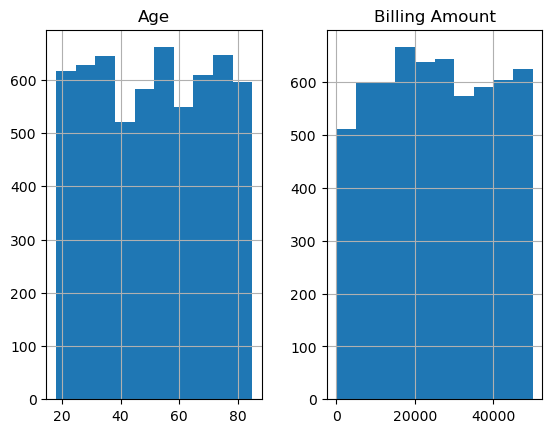

In [15]:
train.hist()

### Dealing with NULL values

In [16]:
train.dropna(axis=0, inplace=True)
train.head()

,Age,Gender,Blood Type,Medical Condition,Date of Admission,Insurance Provider,Billing Amount,Admission Type,Discharge Date,Medication,Test Results
0,35,Male,O+,Asthma,2023-06-01,UnitedHealthcare,47304.064845,Emergency,2023-06-15,Lipitor,Normal
2,49,Male,B-,Asthma,2020-05-02,Medicare,23303.322092,Urgent,2020-05-03,Penicillin,Abnormal
4,41,Male,AB+,Arthritis,2020-08-20,Aetna,22522.363385,Urgent,2020-08-23,Aspirin,Abnormal
5,82,Male,AB+,Hypertension,2021-03-22,Cigna,39593.435761,Urgent,2021-04-15,Lipitor,Abnormal
6,55,Female,O-,Arthritis,2019-05-16,Blue Cross,13546.817249,Elective,2019-06-02,Aspirin,Normal


In [17]:
train.shape

(6034, 11)

### Checking anomalies in date columns

In [18]:
from re import *

# checks the date format & limits of days, months, years
def get_anomalies(series):
    regex = "\d{4}-\d{2}-\d{2}"
    pattern = compile(regex)
    list = []
    for cell in series:
        stringify_cell = str(cell)
        if pattern.match(stringify_cell) == None:
            list.append(stringify_cell)
        else:
            year, month, day = stringify_cell.split("-")
            year = int(year)
            month = int(month)
            day = int(day)
            if(year > 2023 or year < 2000):
                list.append(stringify_cell)
            if(month > 12 or month < 1):
                list.append(stringify_cell)
            if(day > 31 or day < 1):
                list.append(stringify_cell)
    return list


In [19]:
# [1] check the format and day & month & year limits
admission_date_anomalies = get_anomalies(train["Date of Admission"])
admission_date_anomalies

[]

In [20]:
discharge_date_anomalies = get_anomalies(train["Discharge Date"])
discharge_date_anomalies

[]

In [21]:
# [2] Ensure that Admission date is before Discharge date
# to do that, we need to convert their data types to datetime
from datetime import date
train["Date of Admission"] = pd.to_datetime(train["Date of Admission"])
train["Discharge Date"] = pd.to_datetime(train["Discharge Date"])
train.info()
# here we should see the data types changed (strings -> datetime)

<class 'pandas.core.frame.DataFrame'>
Index: 6034 entries, 0 to 6049
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Age                 6034 non-null   int64         
 1   Gender              6034 non-null   object        
 2   Blood Type          6034 non-null   object        
 3   Medical Condition   6034 non-null   object        
 4   Date of Admission   6034 non-null   datetime64[ns]
 5   Insurance Provider  6034 non-null   object        
 6   Billing Amount      6034 non-null   float64       
 7   Admission Type      6034 non-null   object        
 8   Discharge Date      6034 non-null   datetime64[ns]
 9   Medication          6034 non-null   object        
 10  Test Results        6034 non-null   object        
dtypes: datetime64[ns](2), float64(1), int64(1), object(7)
memory usage: 565.7+ KB


In [22]:
# make a column for the differences between the 2 dates
train["Differences"] = train["Discharge Date"] - train["Date of Admission"]
train["Differences"] = train["Differences"].dt.days

train.info() # Now, we should see that differnces is of int datatype

<class 'pandas.core.frame.DataFrame'>
Index: 6034 entries, 0 to 6049
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Age                 6034 non-null   int64         
 1   Gender              6034 non-null   object        
 2   Blood Type          6034 non-null   object        
 3   Medical Condition   6034 non-null   object        
 4   Date of Admission   6034 non-null   datetime64[ns]
 5   Insurance Provider  6034 non-null   object        
 6   Billing Amount      6034 non-null   float64       
 7   Admission Type      6034 non-null   object        
 8   Discharge Date      6034 non-null   datetime64[ns]
 9   Medication          6034 non-null   object        
 10  Test Results        6034 non-null   object        
 11  Differences         6034 non-null   int64         
dtypes: datetime64[ns](2), float64(1), int64(2), object(7)
memory usage: 612.8+ KB


In [23]:
train.drop(["Date of Admission", "Discharge Date"],axis=1, inplace=True)
train.head()

,Age,Gender,Blood Type,Medical Condition,Insurance Provider,Billing Amount,Admission Type,Medication,Test Results,Differences
0,35,Male,O+,Asthma,UnitedHealthcare,47304.064845,Emergency,Lipitor,Normal,14
2,49,Male,B-,Asthma,Medicare,23303.322092,Urgent,Penicillin,Abnormal,1
4,41,Male,AB+,Arthritis,Aetna,22522.363385,Urgent,Aspirin,Abnormal,3
5,82,Male,AB+,Hypertension,Cigna,39593.435761,Urgent,Lipitor,Abnormal,24
6,55,Female,O-,Arthritis,Blue Cross,13546.817249,Elective,Aspirin,Normal,17


In [24]:
print("Invalid Admission & Discharge dates: ", sum(train["Differences"] < 0))

Invalid Admission & Discharge dates:  0


# Dealing with Outliers

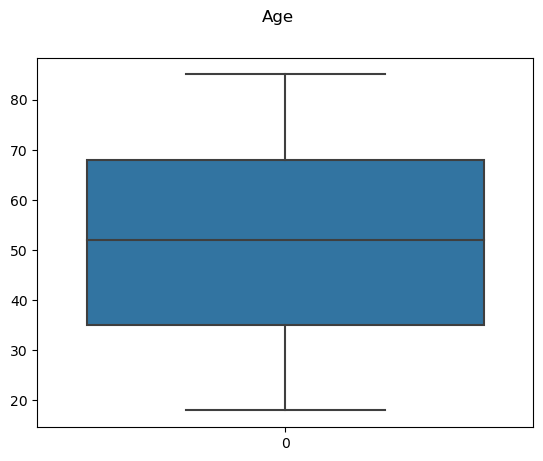

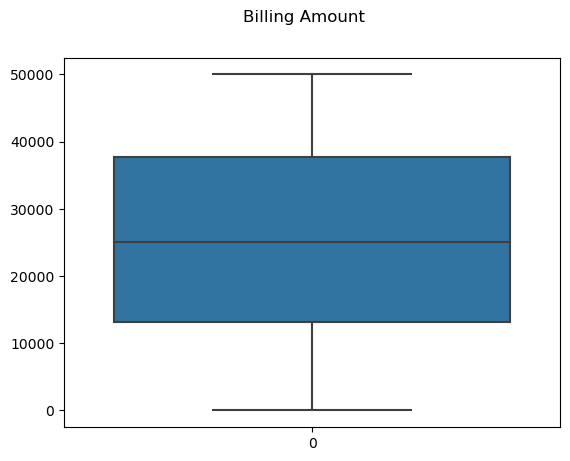

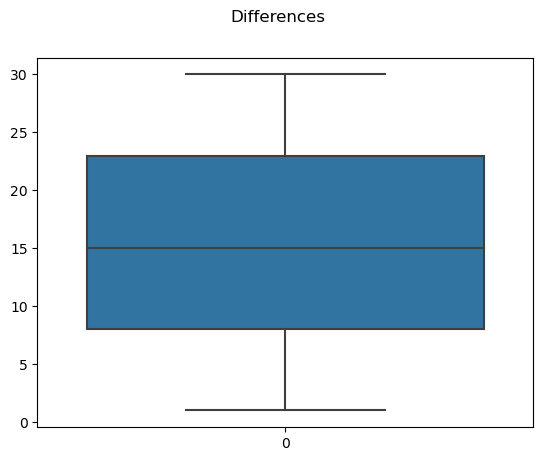

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

numerical_columns = train.select_dtypes(include='number').columns.tolist()

for column in numerical_columns:
    plt.suptitle(column)
    sns.boxplot(train[column])
    plt.show()

### Encoding Categorical data

In [26]:
gender_encoded = {
    'Male': 1,
    'Female': 0
}

Admission_type_encoding = {
    'Elective': 1,
    'Urgent': 2,
    'Emergency': 3
}

test_results = {
    'Normal' : 1,
    'Abnormal' : 0
}

train["Gender"].replace(gender_encoded, inplace=True)
train["Admission Type"].replace(Admission_type_encoding, inplace=True)
train["Test Results"].replace(test_results, inplace=True)

In [27]:
train.head()

,Age,Gender,Blood Type,Medical Condition,Insurance Provider,Billing Amount,Admission Type,Medication,Test Results,Differences
0,35,1,O+,Asthma,UnitedHealthcare,47304.064845,3,Lipitor,1,14
2,49,1,B-,Asthma,Medicare,23303.322092,2,Penicillin,0,1
4,41,1,AB+,Arthritis,Aetna,22522.363385,2,Aspirin,0,3
5,82,1,AB+,Hypertension,Cigna,39593.435761,2,Lipitor,0,24
6,55,0,O-,Arthritis,Blue Cross,13546.817249,1,Aspirin,1,17


* We tried one hot encoding, but it resulted in lower accuracy
* So, we used label encoding

In [28]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()

classes = []

categorical = ['Blood Type', 'Medical Condition', 'Insurance Provider', 'Medication']
for column in categorical:
    train[column] = LE.fit_transform(train[column])
    classes.append(LE.classes_)

In [29]:
train.head()

,Age,Gender,Blood Type,Medical Condition,Insurance Provider,Billing Amount,Admission Type,Medication,Test Results,Differences
0,35,1,6,1,4,47304.064845,3,2,1,14
2,49,1,5,1,3,23303.322092,2,4,0,1
4,41,1,2,0,0,22522.363385,2,0,0,3
5,82,1,2,4,2,39593.435761,2,2,0,24
6,55,0,7,0,1,13546.817249,1,0,1,17


array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Gender'}>,
        <Axes: title={'center': 'Blood Type'}>],
       [<Axes: title={'center': 'Medical Condition'}>,
        <Axes: title={'center': 'Insurance Provider'}>,
        <Axes: title={'center': 'Billing Amount'}>],
       [<Axes: title={'center': 'Admission Type'}>,
        <Axes: title={'center': 'Medication'}>,
        <Axes: title={'center': 'Test Results'}>],
       [<Axes: title={'center': 'Differences'}>, <Axes: >, <Axes: >]],
      dtype=object)

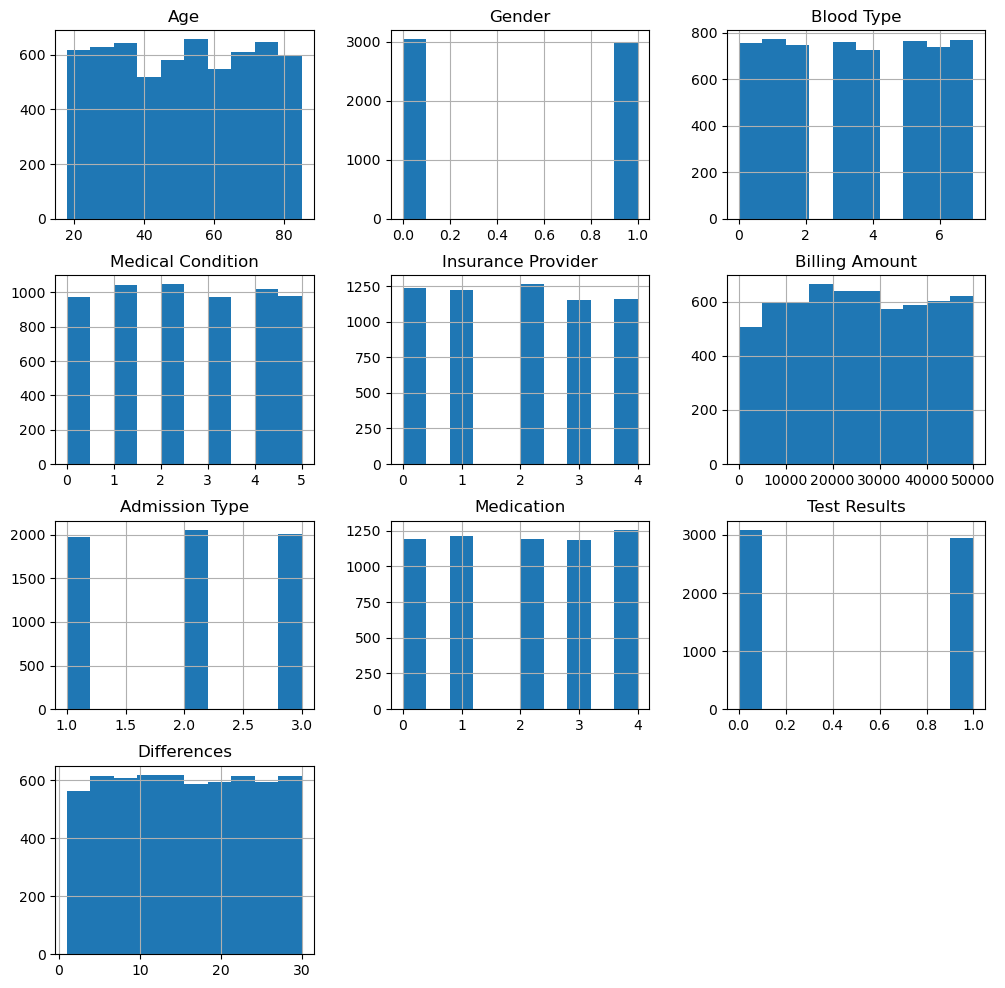

In [30]:
train.hist(figsize=(12,12))

## As seen above, pretty much all features are uniformly distributed

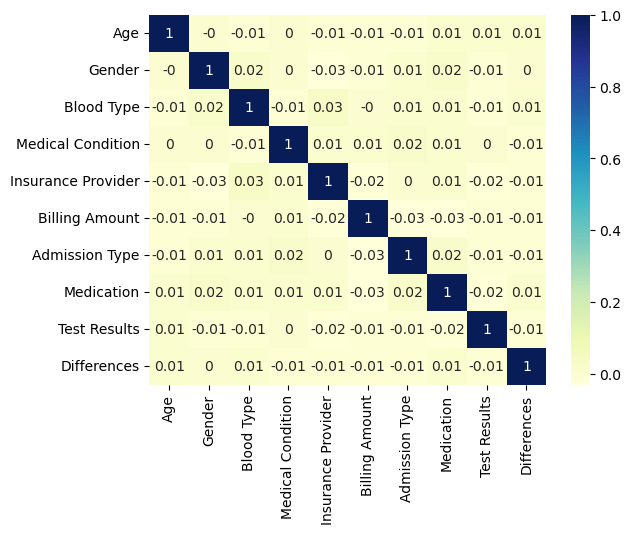

In [31]:
dataplot = sns.heatmap(train.corr().round(2), cmap="YlGnBu", annot=True)

## No correlation at all

### Standardization

In [32]:
from sklearn.preprocessing import Normalizer

normalizer = Normalizer()

train_features = train.drop("Test Results", axis=1).copy()
train_label = train["Test Results"].values.copy()
train_features = normalizer.fit_transform(train_features)




In [33]:
train_features

array([[7.39893886e-04, 2.11398253e-05, 1.26838952e-04, ...,
        6.34194759e-05, 4.22796506e-05, 2.95957554e-04],
       [2.10269973e-03, 4.29122394e-05, 2.14561197e-04, ...,
        8.58244788e-05, 1.71648958e-04, 4.29122394e-05],
       [1.82040981e-03, 4.44002394e-05, 8.88004787e-05, ...,
        8.88004787e-05, 0.00000000e+00, 1.33200718e-04],
       ...,
       [1.78982024e-03, 0.00000000e+00, 1.52789533e-04, ...,
        2.18270761e-05, 4.36541523e-05, 1.74616609e-04],
       [8.75634521e-03, 1.65214061e-04, 9.91284363e-04, ...,
        4.95642182e-04, 4.95642182e-04, 3.30428121e-03],
       [4.02151947e-03, 0.00000000e+00, 0.00000000e+00, ...,
        1.88508725e-04, 1.88508725e-04, 7.54034901e-04]])

## Applying all data pre-processing done on the trianing set on the test set

In [34]:

test.drop(["Name", "Hospital", "Doctor", "Room Number"],axis=1, inplace=True)

test['Billing Amount'] = abs(test['Billing Amount'])
test['Billing Amount'] = test['Billing Amount'].apply(lambda x: min(x, 50000))

test.dropna(axis=0, inplace=True)

In [35]:
# Checking anomalies in date columns:
# [1] check the format and day & month & year limits
admission_date_anomalies = get_anomalies(test["Date of Admission"])
admission_date_anomalies

[]

In [36]:
discharge_date_anomalies = get_anomalies(test["Discharge Date"])
discharge_date_anomalies

[]

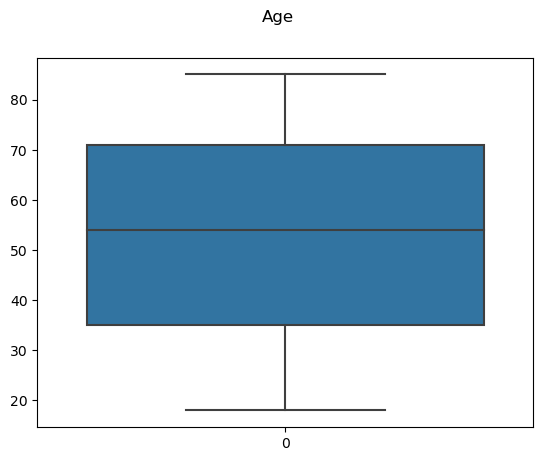

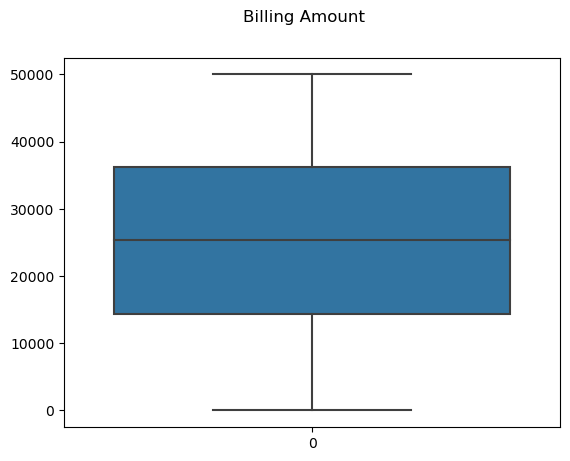

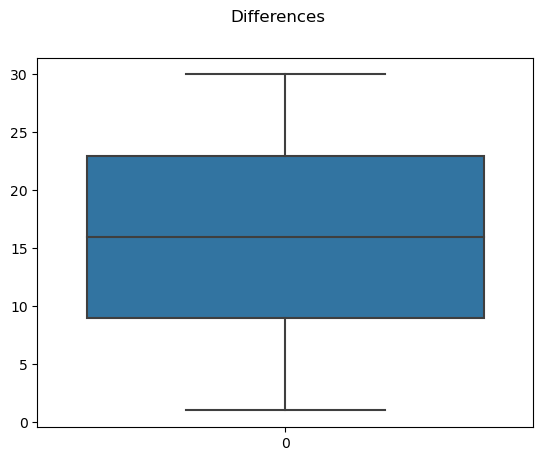

In [37]:
# [2] Ensure that Admission date is before Discharge date
# to do that, we need to convert their data types to datetime
test["Date of Admission"] = pd.to_datetime(test["Date of Admission"])
test["Discharge Date"] = pd.to_datetime(test["Discharge Date"])
test["Differences"] = test["Discharge Date"] - test["Date of Admission"]
test["Differences"] = test["Differences"].dt.days
test.drop(["Date of Admission", "Discharge Date"],axis=1, inplace=True)

for column in numerical_columns:
    plt.suptitle(column)
    sns.boxplot(test[column])
    plt.show()

In [38]:
test["Gender"].replace(gender_encoded, inplace=True)
test["Admission Type"].replace(Admission_type_encoding, inplace=True)
test["Test Results"].replace(test_results, inplace=True)
test.head()

,Age,Gender,Blood Type,Medical Condition,Insurance Provider,Billing Amount,Admission Type,Medication,Test Results,Differences
0,84,1,AB-,Hypertension,Cigna,5402.833461,1,Penicillin,0,9
1,39,0,AB+,Obesity,Blue Cross,48779.537911,1,Ibuprofen,0,29
4,84,1,AB-,Cancer,Medicare,1739.106108,2,Lipitor,1,30
5,80,1,O+,Arthritis,Cigna,34865.241659,3,Paracetamol,0,19
6,42,1,O-,Cancer,UnitedHealthcare,23130.841424,3,Ibuprofen,1,3


In [39]:
index = 0
for column in categorical:
    LE.classes_ = classes[index]
    test[column] = LE.transform(test[column])
    index += 1
test.head()

,Age,Gender,Blood Type,Medical Condition,Insurance Provider,Billing Amount,Admission Type,Medication,Test Results,Differences
0,84,1,3,4,2,5402.833461,1,4,0,9
1,39,0,2,5,1,48779.537911,1,1,0,29
4,84,1,3,2,3,1739.106108,2,2,1,30
5,80,1,6,0,2,34865.241659,3,3,0,19
6,42,1,7,2,4,23130.841424,3,1,1,3


In [40]:
test_features = test.drop("Test Results", axis=1).copy()
test_label = test["Test Results"].values.copy()
test_features = normalizer.fit_transform(test_features)

test

,Age,Gender,Blood Type,Medical Condition,Insurance Provider,Billing Amount,Admission Type,Medication,Test Results,Differences
0,84,1,3,4,2,5402.833461,1,4,0,9
1,39,0,2,5,1,48779.537911,1,1,0,29
4,84,1,3,2,3,1739.106108,2,2,1,30
5,80,1,6,0,2,34865.241659,3,3,0,19
6,42,1,7,2,4,23130.841424,3,1,1,3
...,...,...,...,...,...,...,...,...,...,...
669,83,1,0,5,4,39606.840083,1,1,0,4
670,47,0,2,0,1,5995.717488,3,1,1,23
671,54,1,5,0,1,49559.202905,1,1,1,14
672,84,1,0,0,4,25236.344761,2,4,1,20


# Training Models

In [41]:
x_ = train.drop(['Test Results'], axis=1).values.copy()
y_ = train['Test Results'].values.copy()

## [1] Decision Tree (ID3)

In [42]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

ID3 = DecisionTreeClassifier(random_state=42)

cv_scores = cross_val_score(ID3, x_, y_, cv=5, scoring='accuracy')  # You can specify a different scoring metric if needed
predictions = cross_val_predict(ID3, x_, y_, cv=5)

# cross-validation scores
print("Cross-validation scores:", cv_scores.round(3))
print("Mean Cross-validation score:", cv_scores.mean().round(3))
ID3_CM = confusion_matrix(y_, predictions)

Cross-validation scores: [0.525 0.508 0.5   0.539 0.522]
Mean Cross-validation score: 0.519


## [2] Logistic Regression

In [43]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(random_state=42)

cv_scores = cross_val_score(LR, x_, y_, cv=5, scoring='accuracy')  # You can specify a different scoring metric if needed
predictions = cross_val_predict(LR, x_, y_, cv=5)
# Display the cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean CV score:", cv_scores.mean())
confusion_matrix(y_, predictions)
LR_CM = confusion_matrix(y_, predictions)


Cross-validation scores: [0.51201326 0.51201326 0.50704225 0.51284176 0.51243781]
Mean CV score: 0.5112696665801069


In [44]:
LR_CM

array([[2955,  137],
       [2812,  130]], dtype=int64)

## [3] SVM (Linear kernel)

In [45]:
#from sklearn import svm

#SV_C_Linear = svm.SVC(kernel='linear')

#cv_scores = cross_val_score(SV_C_Linear, x_, y_, cv=5, scoring='accuracy')  # You can specify a different scoring metric if needed
#predictions = cross_val_predict(SV_C_Linear, x_, y_, cv=5)
# Display the cross-validation scores
#print("Cross-validation scores:", cv_scores)
#print("Mean CV score:", cv_scores.mean())
#confusion_matrix(y_, predictions)
#SV_C_Linear_CM = confusion_matrix(y_, predictions)




## [4] SVM (rbf kernel)

In [46]:
from sklearn import svm

SV_C_RBF = svm.SVC(kernel='rbf', random_state=42)

cv_scores = cross_val_score(SV_C_RBF, x_, y_, cv=5, scoring='accuracy')  # You can specify a different scoring metric if needed
predictions = cross_val_predict(SV_C_RBF, x_, y_, cv=5)
# Display the cross-validation scores\


print("Cross-validation scores:", cv_scores)
print("Mean CV score:", cv_scores.mean())
confusion_matrix(y_, predictions)
SV_C_RBF_CM = confusion_matrix(y_, predictions)


Cross-validation scores: [0.51201326 0.51201326 0.51284176 0.51284176 0.51243781]
Mean CV score: 0.5124295671600573


In [47]:
y_

array([1, 0, 0, ..., 1, 0, 1], dtype=int64)

In [48]:
SV_C_RBF_CM

array([[3092,    0],
       [2942,    0]], dtype=int64)

## [5] SVM (sigmoid kernel)

In [49]:
from sklearn import svm

SV_C_SGMD = svm.SVC(kernel='sigmoid',random_state=42)

cv_scores = cross_val_score(SV_C_SGMD, x_, y_, cv=5, scoring='accuracy')  # You can specify a different scoring metric if needed
predictions = cross_val_predict(SV_C_SGMD, x_, y_, cv=5)
# Display the cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean CV score:", cv_scores.mean())
confusion_matrix(y_, predictions)
SV_C_SGMD_CM = confusion_matrix(y_, predictions)
SV_C_SGMD_CM

Cross-validation scores: [0.50787075 0.48218724 0.51532726 0.47390224 0.49419569]
Mean CV score: 0.4946966355738568


array([[1566, 1526],
       [1523, 1419]], dtype=int64)

## Calculating Accuracy Metrics (Precision, Recall, F1-Score)

In [50]:
print(SV_C_SGMD_CM[0][0]) #true negative
print(SV_C_SGMD_CM[0][1]) #false positive
print(SV_C_SGMD_CM[1][0]) #false negative
print(SV_C_SGMD_CM[1][1]) #true positive

1566
1526
1523
1419


In [51]:
def calculate_precision_n_recall(confusion_matrix):
  TN = confusion_matrix[0][0]
  FP = confusion_matrix[0][1]
  FN = confusion_matrix[1][0]
  TP = confusion_matrix[1][1]

  precision = (TP / (TP + FP)).round(3)
  recall = (TP / (TP + FN)).round(3)
  F1_Score = (2 * precision * recall / (precision + recall)).round(3)
  acc_metrics = f"precision: {(precision*100).round(3)}%, recall: {(recall*100).round(3)}%, F1-Score: {(F1_Score*100).round(3)}%"
  return acc_metrics

In [52]:
print("Metrics of ID3: ", calculate_precision_n_recall(ID3_CM))
print("Metrics of Logistic Regression: ", calculate_precision_n_recall(LR_CM))
#print("Metrics of SVM Linear kernel: ", calculate_precision_n_recall(SV_C_Linear_CM))
print("Metrics of SVM RBF kernel: ", calculate_precision_n_recall(SV_C_RBF_CM))
print("Metrics of SVM Sigmoid kernel: ", calculate_precision_n_recall(SV_C_SGMD_CM))

Metrics of ID3:  precision: 50.7%, recall: 50.7%, F1-Score: 50.7%
Metrics of Logistic Regression:  precision: 48.7%, recall: 4.4%, F1-Score: 8.1%
Metrics of SVM RBF kernel:  precision: nan%, recall: 0.0%, F1-Score: nan%
Metrics of SVM Sigmoid kernel:  precision: 48.2%, recall: 48.2%, F1-Score: 48.2%


C:\Users\mahmo\AppData\Local\Temp\ipykernel_2504\801578257.py:7: RuntimeWarning: invalid value encountered in scalar divide
  precision = (TP / (TP + FP)).round(3)


In [53]:
from sklearn.metrics import accuracy_score
ID3_2 = DecisionTreeClassifier(random_state=42)
ID3_2.fit(train_features, train_label)
predictions = ID3_2.predict(test_features)
cm1 = confusion_matrix(test_label, predictions)
print(calculate_precision_n_recall(cm1))
print(accuracy_score(test_label, predictions))


precision: 42.6%, recall: 44.3%, F1-Score: 43.4%
0.45317220543806647


In [54]:
from sklearn.metrics import accuracy_score

LR2 = LogisticRegression(random_state=42)

LR2.fit(train_features, train_label)

predictions = LR2.predict(test_features)

cm2 = confusion_matrix(test_label, predictions)
print(cm2)
print(calculate_precision_n_recall(cm2))

print(accuracy_score(test_label, predictions))

[[345   3]
 [314   0]]
precision: 0.0%, recall: 0.0%, F1-Score: nan%
0.5211480362537765


C:\Users\mahmo\AppData\Local\Temp\ipykernel_2504\801578257.py:9: RuntimeWarning: invalid value encountered in scalar divide
  F1_Score = (2 * precision * recall / (precision + recall)).round(3)


In [55]:
from sklearn.metrics import accuracy_score

SVM_RBF = svm.SVC(kernel='rbf', random_state=42)

SVM_RBF.fit(train_features, train_label)

predictions = SVM_RBF.predict(test_features)

cm3 = confusion_matrix(test_label, predictions)
print(cm3)
print(calculate_precision_n_recall(cm3))

print(accuracy_score(test_label, predictions))

[[345   3]
 [314   0]]
precision: 0.0%, recall: 0.0%, F1-Score: nan%
0.5211480362537765


C:\Users\mahmo\AppData\Local\Temp\ipykernel_2504\801578257.py:9: RuntimeWarning: invalid value encountered in scalar divide
  F1_Score = (2 * precision * recall / (precision + recall)).round(3)


In [56]:
from sklearn.metrics import accuracy_score

SVM_sg = svm.SVC(kernel='sigmoid', random_state=42)

SVM_sg.fit(train_features, train_label)

predictions = SVM_sg.predict(test_features)

cm4 = confusion_matrix(test_label, predictions)
print(cm4)
print(calculate_precision_n_recall(cm4))

print(accuracy_score(test_label, predictions))

[[345   3]
 [314   0]]
precision: 0.0%, recall: 0.0%, F1-Score: nan%
0.5211480362537765


C:\Users\mahmo\AppData\Local\Temp\ipykernel_2504\801578257.py:9: RuntimeWarning: invalid value encountered in scalar divide
  F1_Score = (2 * precision * recall / (precision + recall)).round(3)


In [57]:
from sklearn.preprocessing import PolynomialFeatures

pf = PolynomialFeatures()


